Nodos:
- Cada nodo representará una criptomoneda en un momento específico.
Atributos de cada nodo:
Precio, Market Cap, Total Supply, Max Supply, Symbol
- Ejemplo: nodo "Dogecoin_2022-01-01"

Aristas:
- Las aristas representarán la evolución temporal de una criptomoneda.
- Utilizando la formula: (precio_1 - precio_2)/precio_2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [3]:
data_total = pd.read_csv('data_total.csv')

G = nx.DiGraph()

for i in range(len(data_total) - 1):
    current_row = data_total.iloc[i]
    next_row = data_total.iloc[i + 1]

    price_change_percent = ((next_row['Price (USD)'] - current_row['Price (USD)']) / current_row['Price (USD)']) * 100

    current_node = f"{current_row['Crypto']}_{current_row['Date']}"
    G.add_node(current_node, Price=current_row['Price (USD)'], Market_Cap=current_row['Market Cap'],
               Total_Supply=current_row['Total Supply'], Max_Supply=current_row['Max Supply'],
               Symbol=current_row['Symbol'])

    next_node = f"{next_row['Crypto']}_{next_row['Date']}"
    G.add_node(next_node, Price=next_row['Price (USD)'], Market_Cap=next_row['Market Cap'],
               Total_Supply=next_row['Total Supply'], Max_Supply=next_row['Max Supply'],
               Symbol=next_row['Symbol'])

    G.add_edge(current_node, next_node, weight=price_change_percent)

print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

Número de nodos: 15401
Número de aristas: 15400


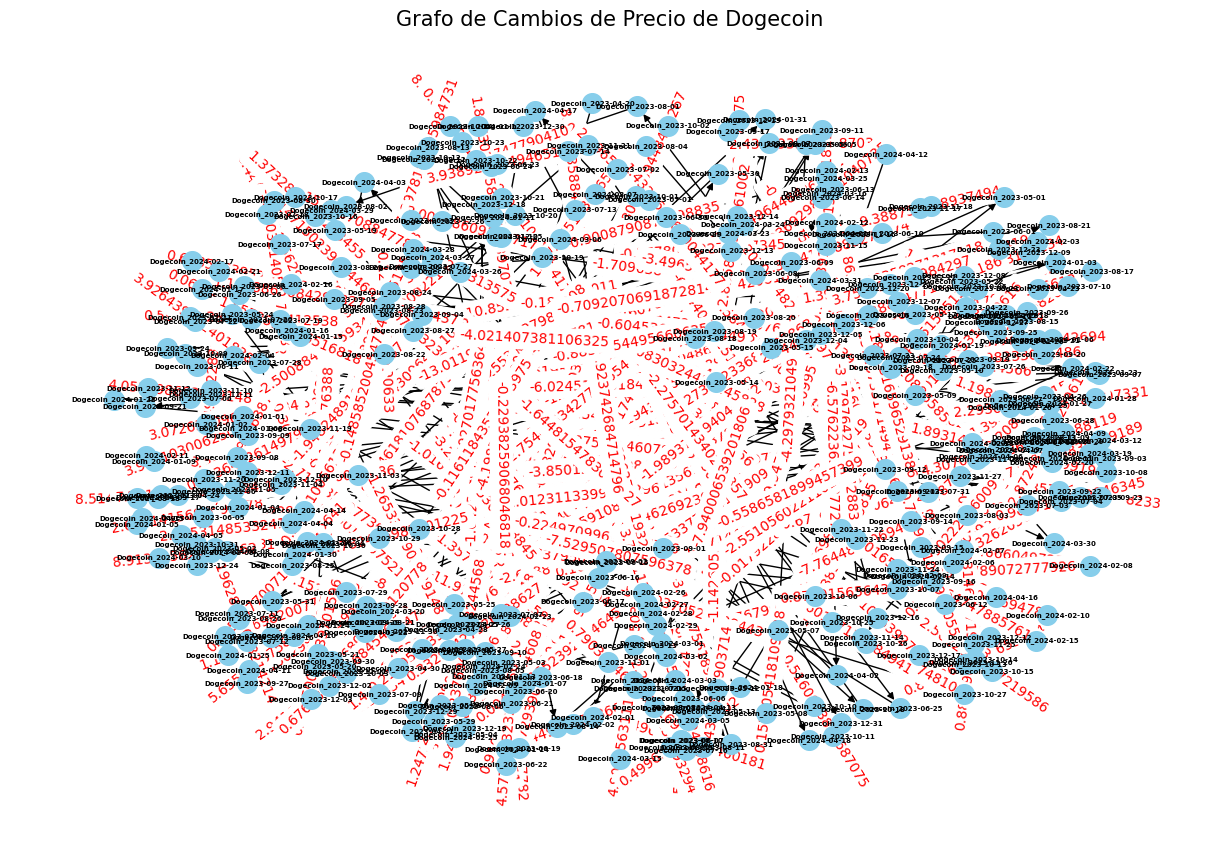

In [4]:
Dogecoin_graph = G.subgraph([node for node in G.nodes() if node.split('_')[0] == 'Dogecoin'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(Dogecoin_graph)
nx.draw(Dogecoin_graph, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=5, font_weight='bold', arrows=True)
edge_labels = nx.get_edge_attributes(Dogecoin_graph, 'weight')
nx.draw_networkx_edge_labels(Dogecoin_graph, pos, edge_labels=edge_labels, font_color='red')
plt.title('Grafo de Cambios de Precio de Dogecoin', fontsize=15)
plt.show()



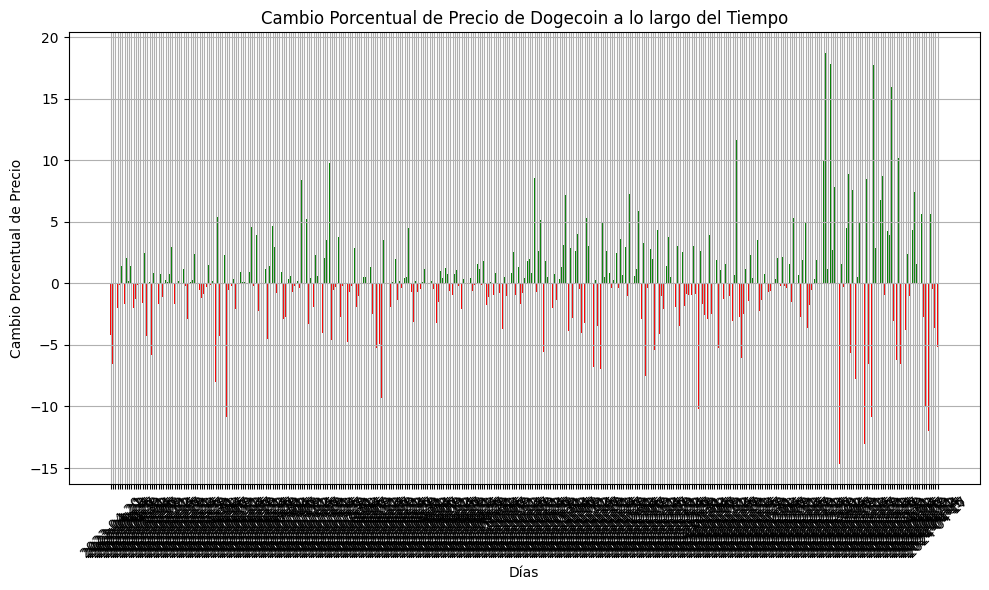

In [5]:
dogecoin_graph = G.subgraph([node for node in G.nodes() if node.split('_')[0] == 'Dogecoin'])

sorted_nodes = sorted(dogecoin_graph.nodes(), key=lambda x: pd.to_datetime(x.split('_')[1]))

price_changes = []
for i in range(len(sorted_nodes) - 1):
    current_node = sorted_nodes[i]
    next_node = sorted_nodes[i + 1]
    price_change = ((dogecoin_graph.nodes[next_node]['Price'] - dogecoin_graph.nodes[current_node]['Price']) / dogecoin_graph.nodes[current_node]['Price']) * 100
    price_changes.append(price_change)

colors = ['red' if change < 0 else 'green' for change in price_changes]

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(price_changes) + 1), price_changes, color=colors)
plt.xlabel('Días')
plt.ylabel('Cambio Porcentual de Precio')
plt.title('Cambio Porcentual de Precio de Dogecoin a lo largo del Tiempo')
plt.xticks(range(1, len(price_changes) + 1), [node.split('_')[1] for node in sorted_nodes[:-1]], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
